In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-daily-trending-repos/github_daily_trending.csv


In [2]:
!ls

__notebook__.ipynb


In [3]:
df = pd.read_csv('/kaggle/input/github-daily-trending-repos/github_daily_trending.csv')
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [4]:
df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              65
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

In [5]:
df.describe()

,star,forks,daily_star
count,9797.000000,9797.000000,9953.000000
mean,23821.563029,3771.324997,76.110921
std,40314.013752,7616.247858,246.852491
min,23.000000,3.000000,0.000000
25%,4556.000000,500.000000,5.000000
50%,12002.000000,1352.000000,15.000000
75%,26332.000000,3587.000000,49.000000
max,408622.000000,78939.000000,8559.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9953 entries, 0 to 9952
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_name           9953 non-null   object 
 1   repo_name          9953 non-null   object 
 2   repo_url           9953 non-null   object 
 3   description        9953 non-null   object 
 4   language           9888 non-null   object 
 5   star               9797 non-null   float64
 6   forks              9797 non-null   float64
 7   daily_star         9953 non-null   int64  
 8   date               9953 non-null   object 
 9   trending_category  9953 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 777.7+ KB


<Axes: >

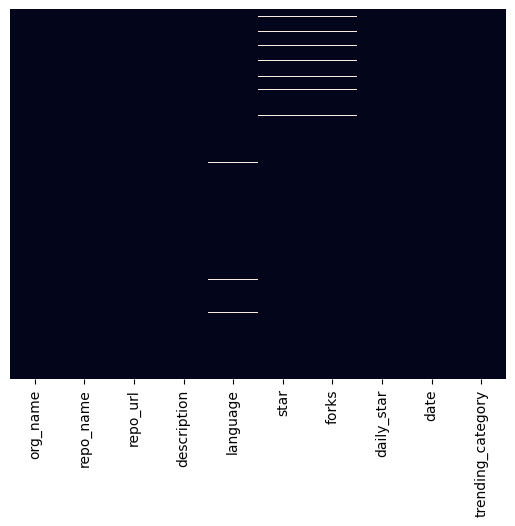

In [7]:
sns.heatmap(data=df.isna(), cbar=False, yticklabels=False)

In [8]:
df.columns

Index(['org_name', 'repo_name', 'repo_url', 'description', 'language', 'star',
       'forks', 'daily_star', 'date', 'trending_category'],
      dtype='object')

In [9]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [10]:
df['language'].unique()

array(['Go', 'Python', 'Rust', 'Ruby', 'Kotlin', 'Makefile',
       'Jupyter Notebook', 'TypeScript', 'Svelte', 'C', 'Markdown', 'C++',
       'C#', nan, 'Java', 'HTML', 'JavaScript', 'PHP', 'Shell', 'CSS',
       'MDX', 'Swift', 'Dart', 'Vue', 'LLVM', 'PowerShell', 'Blade',
       'Haskell', 'Zig', 'Lua', 'Elixir', 'PureScript', 'Scala'],
      dtype=object)

In [11]:
df.loc[df['language'] == 'Python']['description']

437     Learn how to design large-scale systems. Prep ...
438                               Stable Diffusion web UI
439                  Free, open source crypto trading bot
440             A recursive internet scanner for hackers.
441     The official gpt4free repository | various col...
                              ...                        
9815             The uncompromising Python code formatter
9816    Interact with your documents using the power o...
9817       The official Python library for the OpenAI API
9818    The Open edX LMS & Studio, powering education ...
9819    Auto_Jobs_Applier_AI_Agent aims to easy job hu...
Name: description, Length: 1358, dtype: object

In [12]:
df['language'].isna().sum()

65

In [13]:
duplicate_df = df.copy()
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [14]:
duplicate_df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              65
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

### Fill NAN values 

In [15]:
fill_values = {'language':'unavailable language', 'star': df['star'].mean(), 'forks': df['forks'].mean()}
duplicate_df.fillna(fill_values, inplace=True)

In [16]:
duplicate_df['date']

0       2024-11-17
1       2024-11-17
2       2024-11-17
3       2024-11-17
4       2024-11-17
           ...    
9948    2025-01-09
9949    2025-01-09
9950    2025-01-09
9951    2025-01-09
9952    2025-01-09
Name: date, Length: 9953, dtype: object

### Convert Date column object to date_format using pd.to_datetime()

In [17]:
duplicate_df['date'] = pd.to_datetime(duplicate_df['date'], errors='coerce')


In [18]:
duplicate_df.isna().sum()

org_name             0
repo_name            0
repo_url             0
description          0
language             0
star                 0
forks                0
daily_star           0
date                 0
trending_category    0
dtype: int64

In [19]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


<Axes: >

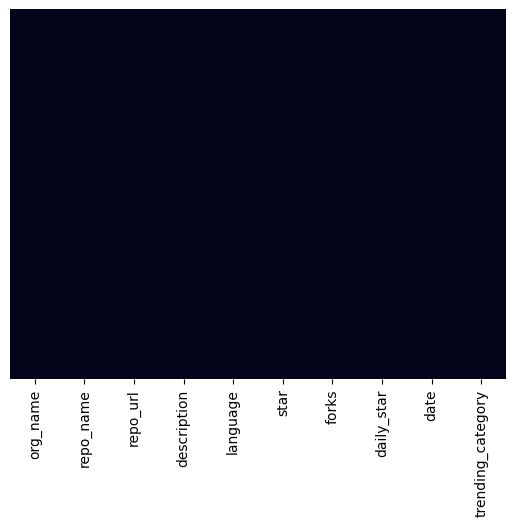

In [20]:
sns.heatmap(data=duplicate_df.isna(), cbar=False, yticklabels=False)

<Axes: title={'center': 'Trending Category Language'}, xlabel='count', ylabel='trending_category'>

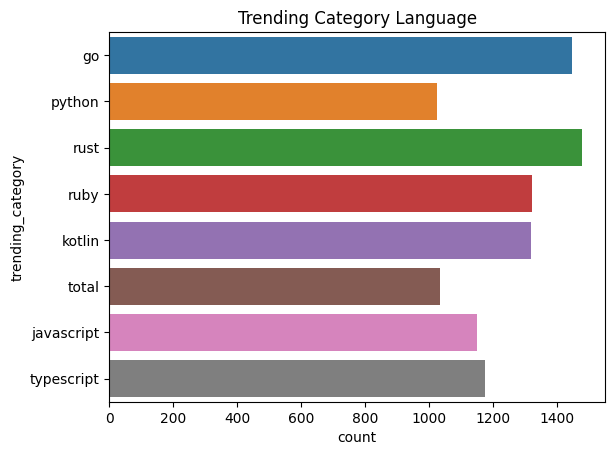

In [21]:
plt.title('Trending Category Language')
sns.countplot(y='trending_category', data=duplicate_df)

In [22]:
duplicate_df[duplicate_df['trending_category'] == 'python']

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
437,donnemartin,system-design-primer,https://github.com/donnemartin/system-design-p...,Learn how to design large-scale systems. Prep ...,Python,276079.0,46342.0,211,2024-11-17,python
438,AUTOMATIC1111,stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,Stable Diffusion web UI,Python,142992.0,26951.0,63,2024-11-17,python
439,freqtrade,freqtrade,https://github.com/freqtrade/freqtrade,"Free, open source crypto trading bot",Python,29089.0,6208.0,24,2024-11-17,python
440,blacklanternsecurity,bbot,https://github.com/blacklanternsecurity/bbot,A recursive internet scanner for hackers.,Python,5680.0,464.0,209,2024-11-17,python
441,xtekky,gpt4free,https://github.com/xtekky/gpt4free,The official gpt4free repository | various col...,Python,61291.0,13327.0,18,2024-11-17,python
...,...,...,...,...,...,...,...,...,...,...
9815,psf,black,https://github.com/psf/black,The uncompromising Python code formatter,Python,39415.0,2499.0,6,2025-01-09,python
9816,zylon-ai,private-gpt,https://github.com/zylon-ai/private-gpt,Interact with your documents using the power o...,Python,54783.0,7364.0,99,2025-01-09,python
9817,openai,openai-python,https://github.com/openai/openai-python,The official Python library for the OpenAI API,Python,23906.0,3395.0,19,2025-01-09,python
9818,openedx,edx-platform,https://github.com/openedx/edx-platform,"The Open edX LMS & Studio, powering education ...",Python,7524.0,3905.0,2,2025-01-09,python


In [23]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


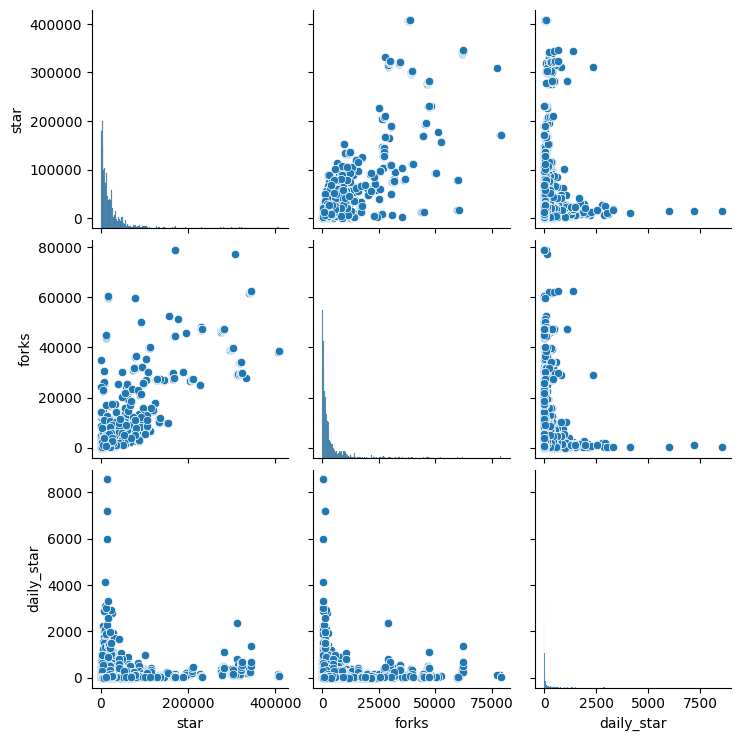

In [24]:
sns.pairplot(data=duplicate_df)

<Axes: xlabel='daily_star', ylabel='date'>

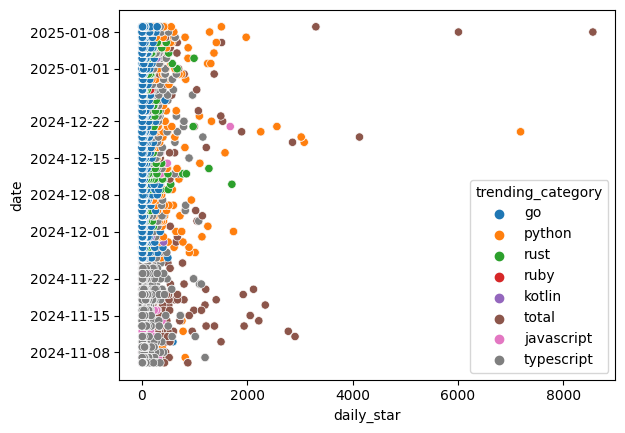

In [25]:
sns.scatterplot(data=duplicate_df, x='daily_star', y='date', hue='trending_category')

In [26]:
duplicate_df['date'].unique()

<DatetimeArray>
['2024-11-17 00:00:00', '2024-11-18 00:00:00', '2024-11-08 00:00:00',
 '2024-11-21 00:00:00', '2024-11-10 00:00:00', '2024-11-16 00:00:00',
 '2024-11-14 00:00:00', '2024-11-22 00:00:00', '2024-11-07 00:00:00',
 '2024-11-15 00:00:00', '2024-11-25 00:00:00', '2024-11-20 00:00:00',
 '2024-11-24 00:00:00', '2024-11-06 00:00:00', '2024-11-13 00:00:00',
 '2024-11-23 00:00:00', '2024-11-09 00:00:00', '2024-11-11 00:00:00',
 '2024-11-19 00:00:00', '2024-11-12 00:00:00', '2024-11-26 00:00:00',
 '2024-11-27 00:00:00', '2024-11-28 00:00:00', '2024-11-29 00:00:00',
 '2024-11-30 00:00:00', '2024-12-01 00:00:00', '2024-12-02 00:00:00',
 '2024-12-03 00:00:00', '2024-12-04 00:00:00', '2024-12-05 00:00:00',
 '2024-12-06 00:00:00', '2024-12-07 00:00:00', '2024-12-08 00:00:00',
 '2024-12-09 00:00:00', '2024-12-10 00:00:00', '2024-12-11 00:00:00',
 '2024-12-12 00:00:00', '2024-12-13 00:00:00', '2024-12-14 00:00:00',
 '2024-12-15 00:00:00', '2024-12-16 00:00:00', '2024-12-17 00:00:00',
 '20

In [27]:
duplicate_df['org_name'].unique()

array(['terrastruct', 'tinygo-org', 'Melkeydev', ..., 'rage-rb', 'a2x',
       'twmb'], dtype=object)

<Axes: >

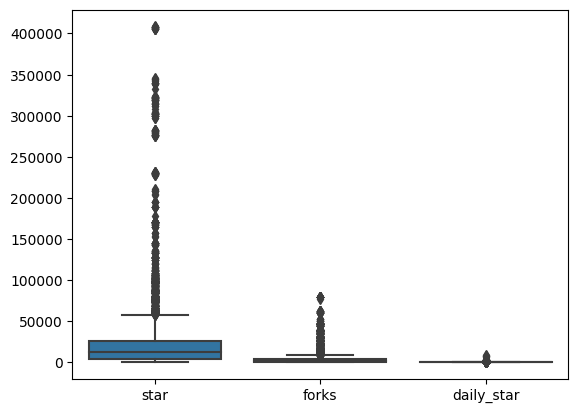

In [28]:
sns.boxplot(data=duplicate_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

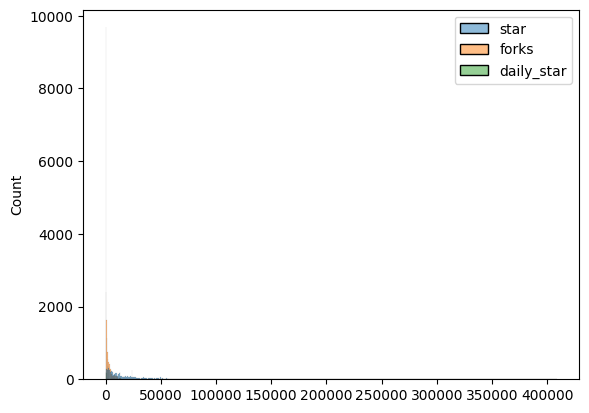

In [29]:
sns.histplot(data=duplicate_df)

In [30]:
df.loc[0:4, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17


In [31]:
df.loc[0:5, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17
5,2024-11-17


In [32]:
df.loc[:5, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17
5,2024-11-17


In [33]:
df.loc[:4, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17


In [34]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [35]:
df.loc[(df['daily_star'] < 5) & (df['daily_star'] > 20), ['org_name', 'repo_name']]

,org_name,repo_name


In [36]:
df[df['daily_star'] > 20]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
6,daytonaio,daytona,https://github.com/daytonaio/daytona,The Open Source Dev Environment Manager.,Go,10583.0,839.0,155,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
9935,prometheus,prometheus,https://github.com/prometheus/prometheus,The Prometheus monitoring system and time seri...,Go,56753.0,9280.0,33,2025-01-09,go
9938,abiosoft,colima,https://github.com/abiosoft/colima,Container runtimes on macOS (and Linux) with m...,Go,20337.0,408.0,32,2025-01-09,go
9942,XTLS,Xray-core,https://github.com/XTLS/Xray-core,"Xray, Penetrates Everything. Also the best v2r...",Go,26633.0,4052.0,51,2025-01-09,go
9945,kubernetes,kubernetes,https://github.com/kubernetes/kubernetes,Production-Grade Container Scheduling and Mana...,Go,112260.0,39983.0,34,2025-01-09,go


In [37]:
df.loc[df['daily_star'] > 20]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
6,daytonaio,daytona,https://github.com/daytonaio/daytona,The Open Source Dev Environment Manager.,Go,10583.0,839.0,155,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
9935,prometheus,prometheus,https://github.com/prometheus/prometheus,The Prometheus monitoring system and time seri...,Go,56753.0,9280.0,33,2025-01-09,go
9938,abiosoft,colima,https://github.com/abiosoft/colima,Container runtimes on macOS (and Linux) with m...,Go,20337.0,408.0,32,2025-01-09,go
9942,XTLS,Xray-core,https://github.com/XTLS/Xray-core,"Xray, Penetrates Everything. Also the best v2r...",Go,26633.0,4052.0,51,2025-01-09,go
9945,kubernetes,kubernetes,https://github.com/kubernetes/kubernetes,Production-Grade Container Scheduling and Mana...,Go,112260.0,39983.0,34,2025-01-09,go


In [38]:
df.loc[df['language'].isin(['Go', 'Python'])]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
9948,moby,moby,https://github.com/moby/moby,The Moby Project - a collaborative project for...,Go,68983.0,18676.0,10,2025-01-09,go
9949,twmb,franz-go,https://github.com/twmb/franz-go,"franz-go contains a feature complete, pure Go ...",Go,1935.0,196.0,6,2025-01-09,go
9950,prometheus,client_golang,https://github.com/prometheus/client_golang,Prometheus instrumentation library for Go appl...,Go,5481.0,1191.0,0,2025-01-09,go
9951,kubernetes,autoscaler,https://github.com/kubernetes/autoscaler,Autoscaling components for Kubernetes,Go,8173.0,3999.0,4,2025-01-09,go


In [39]:
df.loc[[0,1,2]]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go


In [40]:
df.loc[4]

org_name                                                JanDeDobbeleer
repo_name                                                   oh-my-posh
repo_url                  https://github.com/JanDeDobbeleer/oh-my-posh
description          The most customisable and low-latency cross pl...
language                                                            Go
star                                                           17450.0
forks                                                           2390.0
daily_star                                                          16
date                                                        2024-11-17
trending_category                                                   go
Name: 4, dtype: object

In [41]:
df.iloc[4]

org_name                                                JanDeDobbeleer
repo_name                                                   oh-my-posh
repo_url                  https://github.com/JanDeDobbeleer/oh-my-posh
description          The most customisable and low-latency cross pl...
language                                                            Go
star                                                           17450.0
forks                                                           2390.0
daily_star                                                          16
date                                                        2024-11-17
trending_category                                                   go
Name: 4, dtype: object

In [42]:
df['star'].describe()

count      9797.000000
mean      23821.563029
std       40314.013752
min          23.000000
25%        4556.000000
50%       12002.000000
75%       26332.000000
max      408622.000000
Name: star, dtype: float64

<Axes: >

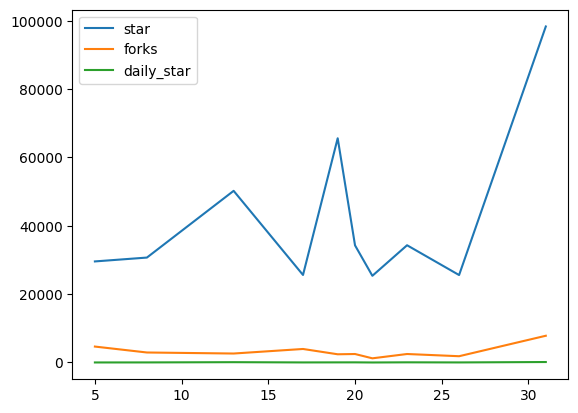

In [43]:
popular_repo = df.loc[df['star'] > df['star'].mean()]
popular_repo.head(10).plot()

In [44]:
popular_repo.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
5,v2fly,v2ray-core,https://github.com/v2fly/v2ray-core,A platform for building proxies to bypass netw...,Go,29573.0,4663.0,12,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
17,XTLS,Xray-core,https://github.com/XTLS/Xray-core,"Xray, Penetrates Everything. Also the best v2r...",Go,25613.0,3956.0,21,2024-11-17,go
19,junegunn,fzf,https://github.com/junegunn/fzf,🌸 A command-line fuzzy finder,Go,65610.0,2405.0,37,2024-11-17,go


In [45]:
daily_star = duplicate_df['daily_star']
daily_star.describe()

count    9953.000000
mean       76.110921
std       246.852491
min         0.000000
25%         5.000000
50%        15.000000
75%        49.000000
max      8559.000000
Name: daily_star, dtype: float64

<Axes: >

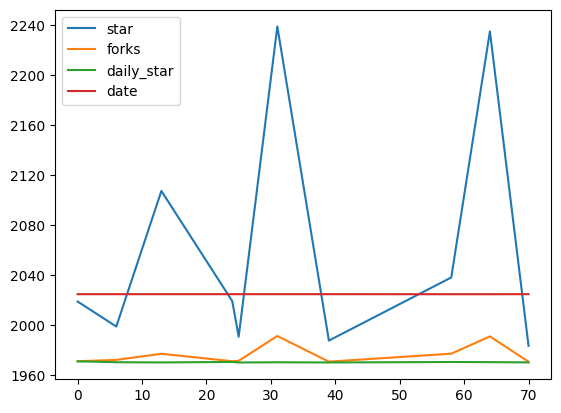

In [46]:
popular_daily_star = duplicate_df.loc[daily_star > daily_star.mean()]
popular_daily_star.head(10).plot()

<Axes: >

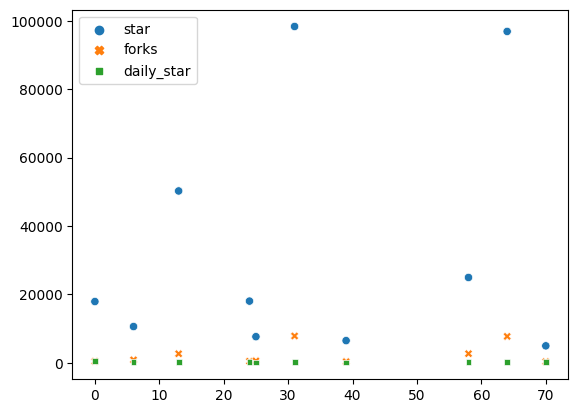

In [47]:
sns.scatterplot(data=popular_daily_star.head(10))

<Axes: xlabel='count', ylabel='language'>

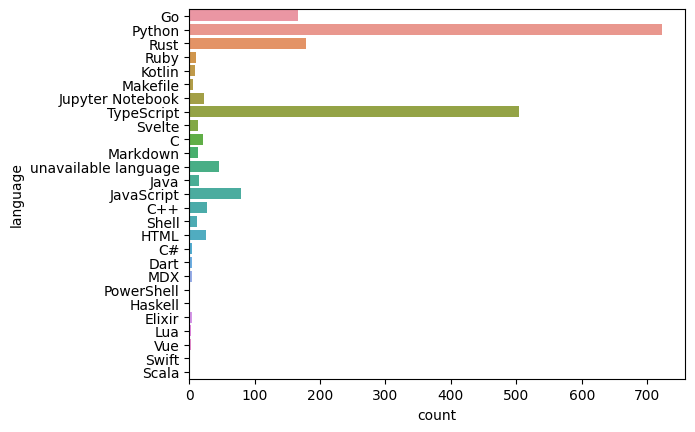

In [48]:
sns.countplot(data=popular_daily_star, y='language')